
In the context of conducting a K-means clustering analysis on a dataset related to house prices, we encountered an issue related to the numpy library version. Initially, we faced difficulties with the threadpoolctl library, which necessitated an upgrade. However, this alone did not resolve the problem.

The breakthrough came when we decided to downgrade the numpy library to version 1.21.4. This change was significant, as it addressed the underlying issue and enabled us to successfully execute the K-means clustering analysis. The decision to downgrade numpy to a specific version was crucial for ensuring the compatibility of the libraries involved in the analysis.


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
# Specify the file path
file_path = "df_copy_4.csv"

In [3]:
# Load the CSV into a Pandas DataFrame
df_copy_4 = pd.read_csv(file_path)

In [4]:
# Display the first few rows of the DataFrame to verify the data has been loaded
df_copy_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cid               21613 non-null  float64
 1   price             21613 non-null  float64
 2   room_bed          21613 non-null  float64
 3   room_bath         21613 non-null  float64
 4   living_measure    21613 non-null  float64
 5   lot_measure       21613 non-null  float64
 6   ceil              21613 non-null  float64
 7   coast             21613 non-null  float64
 8   sight             21613 non-null  float64
 9   condition         21613 non-null  float64
 10  quality           21613 non-null  float64
 11  ceil_measure      21613 non-null  float64
 12  basement          21613 non-null  float64
 13  yr_built          21613 non-null  object 
 14  zipcode           21613 non-null  float64
 15  lat               21613 non-null  float64
 16  long              21613 non-null  float6

C:\Users\Sudhe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


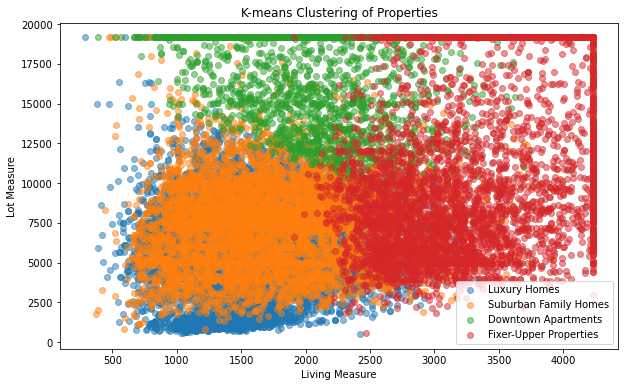

In [5]:

# Select the relevant features for clustering
features = ['living_measure', 'lot_measure', 'ceil_measure', 'quality', 'condition']

# Normalize the data (optional, but recommended)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_normalized = scaler.fit_transform(df_copy_4[features])

# Choose the number of clusters (K=4)
k = 4

# Apply K-means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
df_copy_4['cluster'] = kmeans.fit_predict(df_normalized)

# Define cluster labels based on business interpretation
cluster_labels = {
    0: 'Luxury Homes',
    1: 'Suburban Family Homes',
    2: 'Downtown Apartments',
    3: 'Fixer-Upper Properties'
}
df_copy_4['cluster_name'] = df_copy_4['cluster'].map(cluster_labels)

# Visualize the clustering results (example using a scatterplot)
plt.figure(figsize=(10, 6))
for cluster_id, cluster_name in cluster_labels.items():
    cluster_data = df_copy_4[df_copy_4['cluster'] == cluster_id]
    plt.scatter(cluster_data['living_measure'], cluster_data['lot_measure'], label=cluster_name, alpha=0.5)

plt.title('K-means Clustering of Properties')
plt.xlabel('Living Measure')
plt.ylabel('Lot Measure')
plt.legend()
plt.show()


In [8]:
# Group the data by cluster and calculate summary statistics for each cluster
cluster_summary = df_copy_4.groupby('cluster')[features].describe()

# Print the summary report
print(cluster_summary)


        living_measure                                                   \
                 count         mean         std     min     25%     50%   
cluster                                                                   
0               8981.0  1648.815945  497.368595   290.0  1280.0  1620.0   
1               5559.0  1707.663069  562.855922   370.0  1270.0  1660.0   
2               2608.0  2129.841306  585.041811   384.0  1740.0  2140.0   
3               4465.0  3274.367385  584.271961  1910.0  2800.0  3190.0   

                          lot_measure                ... quality        \
            75%       max       count          mean  ...     75%   max   
cluster                                              ...                 
0        2010.0  3330.000      8981.0   5917.998720  ...     8.0  10.0   
1        2080.0  3920.000      5559.0   7491.401826  ...     7.0  10.0   
2        2510.0  4231.125      2608.0  17234.550709  ...     8.0  10.0   
3        3730.0  4231.125     

In [9]:
# Group the data by cluster and calculate summary statistics for each cluster
cluster_summary = df_copy_4.groupby('cluster')[features].describe()

# Print the count for each cluster
print("Count of Properties in Each Cluster:")
print(cluster_summary['living_measure']['count'])
print("\n")

# Print the mean for each cluster
print("Mean Living Measure for Each Cluster:")
print(cluster_summary['living_measure']['mean'])
print("\n")

# Print the standard deviation for each cluster
print("Standard Deviation of Living Measure for Each Cluster:")
print(cluster_summary['living_measure']['std'])
print("\n")

# Print the minimum value for each cluster
print("Minimum Living Measure for Each Cluster:")
print(cluster_summary['living_measure']['min'])
print("\n")

# Print the 25th percentile for each cluster
print("25th Percentile of Living Measure for Each Cluster:")
print(cluster_summary['living_measure']['25%'])
print("\n")

# Print the median (50th percentile) for each cluster
print("Median (50th Percentile) Living Measure for Each Cluster:")
print(cluster_summary['living_measure']['50%'])
print("\n")

# Print the maximum value for each cluster
print("Maximum Living Measure for Each Cluster:")
print(cluster_summary['living_measure']['max'])
print("\n")


Count of Properties in Each Cluster:
cluster
0    8981.0
1    5559.0
2    2608.0
3    4465.0
Name: count, dtype: float64


Mean Living Measure for Each Cluster:
cluster
0    1648.815945
1    1707.663069
2    2129.841306
3    3274.367385
Name: mean, dtype: float64


Standard Deviation of Living Measure for Each Cluster:
cluster
0    497.368595
1    562.855922
2    585.041811
3    584.271961
Name: std, dtype: float64


Minimum Living Measure for Each Cluster:
cluster
0     290.0
1     370.0
2     384.0
3    1910.0
Name: min, dtype: float64


25th Percentile of Living Measure for Each Cluster:
cluster
0    1280.0
1    1270.0
2    1740.0
3    2800.0
Name: 25%, dtype: float64


Median (50th Percentile) Living Measure for Each Cluster:
cluster
0    1620.0
1    1660.0
2    2140.0
3    3190.0
Name: 50%, dtype: float64


Maximum Living Measure for Each Cluster:
cluster
0    3330.000
1    3920.000
2    4231.125
3    4231.125
Name: max, dtype: float64




In [11]:

# Calculate the Silhouette Score
silhouette_avg = silhouette_score(df_normalized, df_copy_4['cluster'])
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.31250611833808095


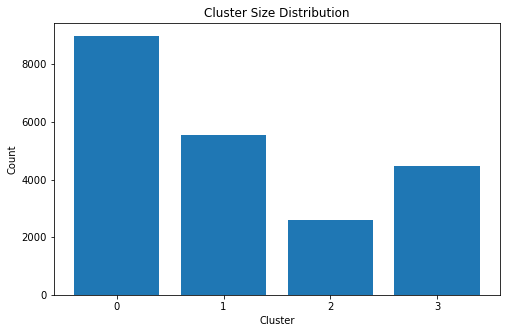

In [12]:

# Calculate the count of data points in each cluster
cluster_counts = df_copy_4['cluster'].value_counts().sort_index()

# Create a bar chart to visualize cluster sizes
plt.figure(figsize=(8, 5))
plt.bar(cluster_counts.index, cluster_counts.values, tick_label=cluster_counts.index)
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Cluster Size Distribution')
plt.show()


C:\Users\Sudhe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Sudhe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Sudhe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Sudhe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

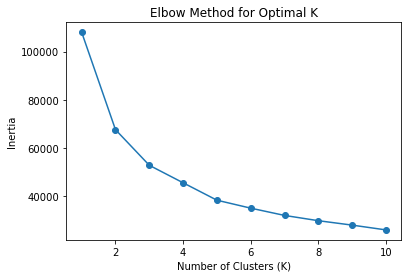

In [13]:

# Range of K values to test
k_values = range(1, 11)
inertia = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_normalized)
    inertia.append(kmeans.inertia_)

plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()


In [14]:
# Print the inertia values
for k, inertia_value in zip(k_values, inertia):
    print(f'K={k}: Inertia={inertia_value}')

K=1: Inertia=108065.00000000023
K=2: Inertia=67541.9866473219
K=3: Inertia=52726.077881861944
K=4: Inertia=45446.72301464921
K=5: Inertia=38202.59283532006
K=6: Inertia=34893.683592637106
K=7: Inertia=31869.095179439148
K=8: Inertia=29675.92783873748
K=9: Inertia=27838.142338952224
K=10: Inertia=25846.255328618332
